# Data recording sheet

| Testing information | |
|---|---|
| Experiment | Rock vs No Rock |
| Description | Test effect of bicycle lean on maximal power output |
| Date | September 9, 2020 |
| Location | Locomotion Laboratory  |
| Subject | RM |
| Calibration factor | 327 |

---
## Protocol

- Charge Garmin, iPad, and IMUs
- Consent form
- Attach IMUs (frame=2050 , crank=2431)
- Set saddle height and handlebar position
- Sanitize bicycle
- Calibrate power meter
- Warm up
- Familiarization trials
- Pmax Test
- Begin experimental trials
  - Sync IMUs with Garmin at start and end of each trial 
- Gift card & signature

| Conditions ||
|---|---|
| 1 | Ad libitum |
| 2 | Self-restricted |
| 3 | Locked |

| Trial order ||
|---|---|
| Warm Up | 5 min at 100 W (3.5 lb) |
| Famil. | Standing and leaning (8.5 lb) |
| Pmax Test | 1, 1, 1 |
| Block 1 | 1, 2, 3 |
| Block 2 | 3, 1, 2 |
| Block 3 | 2, 3, 1 |

---
## Results

| Environmental conditions | |
|---|---|
| Temp. (C) | 21.1 |
| Humidity (%) | 30.9 |
| Pressure (mmHg) | 637 |
| Altitude (m) | 1641 |

| Subject characteristics ||
|---|---|
| Sex | F |
| Age (yrs) | 20 |
| Mass (lb/kg) | 135 / 61.2 |
| Height (ft/m) | 5'7" / 1.7 |

In [ ]:
import numpy as np

mass = 135
listPerc = [0.05, 0.1, 0.15]
listRes = np.array(listPerc)*mass
listRes

array([ 6.75, 13.5 , 20.25])

### Pmax Test

| Condition | Trial | Hanging Weight (Lbs) | Power  (W) | Cadence (RPM) | 
| --- | --- | --- | --- | --- |
| 1 | 1 | 5% b.w. = 6.5 | 670 | 137 |
| 1 | 2 | 10% b.w. = 13.5 | 748 | 112 |
| 1 | 3 | 15% b.w. = 20 | 724 | 88 |

Predicted maximal power output is 779.1009291896978
Predicted optimal hanging weight is 14.5


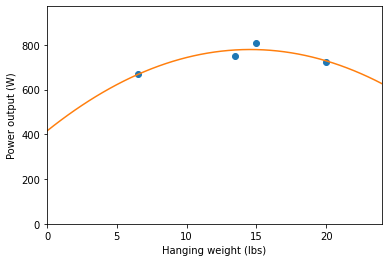

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# set data
x = [6.5, 13.5, 20]
y = [670, 748, 724]

# calculate polynomial 
c = np.polyfit(x,y,2)
poly = np.poly1d(c)

# calculate new x and y values
new_x = np.linspace(0, 50, 101)
new_y = poly(new_x)

# plot the polynomial
plt.plot(x, y, "o", new_x, new_y)
plt.xlim([0, max(x)*1.2])
plt.ylim([0, max(y)*1.2])
plt.xlabel('Hanging weight (lbs)')
plt.ylabel('Power output (W)')

ind = np.argmax(new_y)
xOpt = new_x[ind]
yOpt = max(new_y)

print("Predicted maximal power output is", yOpt)
print("Predicted optimal hanging weight is", xOpt)


### Experimental trials

| Condition | Trial | Power (W) | Cadence (RPM) |
|---|---|---|---|
| 1 | 1 | 861 | 116 |
| 2 | 1 | 699 | 105 |
| 3 | 1 | 815 | 112 |
| 3 | 2 | 804 | 115 |
| 1 | 2 | 828 | 116 |
| 2 | 2 | 735 | 104 |
| 2 | 3 | 737 | 107 |
| 3 | 3 | 813 | 108 |
| 1 | 3 | 733 | 112 |

---
## Data Analysis (Python)


In [ ]:
# create data table
import pandas as pd
import numpy as np

data = pd.DataFrame(np.array([
                              [6, 1, 1, 14.5, 861, 116], 
                              [6, 2, 1, 14.5, 699, 105], 
                              [6, 3, 1, 14.5, 815, 112],
                              [6, 3, 2, 14.5, 804, 115],
                              [6, 1, 2, 14.5, 828, 116],
                              [6, 2, 2, 14.5, 735, 104],
                              [6, 2, 3, 14.5, 737, 107],
                              [6, 3, 3, 14.5, 813, 108],
                              [6, 1, 3, 14.5, 733, 112]
                              ]),
                    columns=['subject','condition', 'trial','hanging weight','power', 'cadence'])
data

,condition,trial,power,cadence
0,1,1,861,116
1,2,1,699,105
2,3,1,815,112
3,3,2,804,115
4,1,2,828,116
5,2,2,735,104
6,2,3,737,107
7,3,3,813,108
8,1,3,733,112


In [ ]:
data.groupby('condition')[['power','cadence']].mean()

,power,cadence
condition,,
1,807.333333,114.666667
2,723.666667,105.333333
3,810.666667,111.666667


In [ ]:
data.groupby('condition')[['power','cadence']].std()

,power,cadence
condition,,
1,66.455499,2.309401
2,21.385353,1.527525
3,5.859465,3.511885
